In [ ]:
%matplotlib inline

In [ ]:
! sudo apt-get install texlive-latex-recommended 
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended


In [ ]:
!sudo apt install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import numpy as np
import time
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input
import matplotlib.pyplot as plt
from google.colab import files
import matplotlib
import pickle
import seaborn as sn

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
matplotlib.rcParams['text.latex.unicode']=True



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.8.0
Running on TPU  ['10.118.205.194:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.118.205.194:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.118.205.194:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
from google.colab import drive

drive.mount('/gdrive', force_remount = True)

Xd = pd.read_pickle("/gdrive/MyDrive/RML2016.10a_dict.pkl")

Mounted at /gdrive


In [ ]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
print(len(snrs), len(mods))

20 11


In [ ]:
# Load the dataset ...
#  You will need to seperately download or generate this file

snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = int(n_examples * 0.5)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))

in_shp = list(X_train.shape[1:])
print(X_train.shape, in_shp)
classes = mods

print(X_train.transpose((0,2,1)).shape)

X_train = X_train.transpose((0,2,1))
X_test = X_test.transpose((0,2,1))
print(X_test.shape)

(110000, 2, 128) [2, 128]
(110000, 128, 2)
(110000, 128, 2)


In [ ]:
inputs = Input(shape=(None, 128, 2))

with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model = keras.Sequential()
  model.add(layers.LSTM(32, return_sequences=True))
  model.add(layers.LSTM(32, return_sequences=True))
  model.add(layers.LSTM(32, return_sequences=False))
  model.add(layers.Dense(32, activation="relu"))
  model.add(layers.Dense(32, activation="relu"))
  model.add(layers.Dense(32, activation="relu"))
  model.add(layers.Dense(len(classes), activation="softmax"))

  model.build((None,128,2))
  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 128, 32)           4480      
                                                                 
 lstm_10 (LSTM)              (None, 128, 32)           8320      
                                                                 
 lstm_11 (LSTM)              (None, 32)                8320      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 11)               

In [ ]:
print(n_examples)

220000


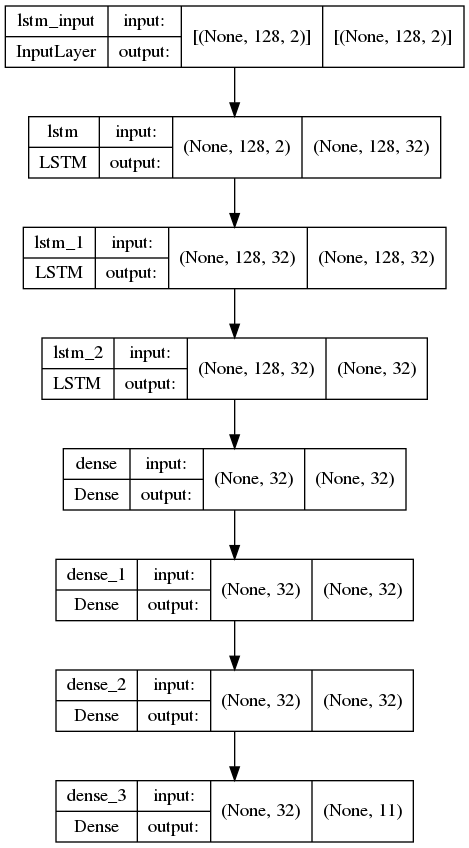

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
filepath = 'test.wts.h5'
nb_epoch = 100     # number of epochs to train on
batch_size = 1024  # training batch size
history = model.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    #show_accuracy=True,
    verbose=2,
    validation_data=(X_test, Y_test),
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished
model.load_weights(filepath)

Epoch 1/100
108/108 - 30s - loss: 2.3762 - val_loss: 2.3971 - 30s/epoch - 274ms/step
Epoch 2/100
108/108 - 9s - loss: 2.3902 - val_loss: 2.3988 - 9s/epoch - 86ms/step
Epoch 3/100
108/108 - 10s - loss: 2.3982 - val_loss: 2.3979 - 10s/epoch - 88ms/step
Epoch 4/100
108/108 - 9s - loss: 2.3980 - val_loss: 2.3980 - 9s/epoch - 88ms/step
Epoch 5/100
108/108 - 9s - loss: 2.3980 - val_loss: 2.3980 - 9s/epoch - 86ms/step
Epoch 6/100
108/108 - 9s - loss: 2.3980 - val_loss: 2.3980 - 9s/epoch - 85ms/step


In [ ]:
nb_epoch = 100     # number of epochs to train on
batch_size = 1024  # training batch size

In [ ]:
model.load_weights("/content/sample_data/LSTM.wts.h5")


In [ ]:
score = model.evaluate(X_test, Y_test, batch_size=1024)
print(score)

108/108 [==============================] - 12s 37ms/step - loss: 1.6561 - accuracy: 0.3733
[1.6561037302017212, 0.3733000159263611]


In [ ]:
history = pickle.load(open("/content/sample_data/LSTMtrainHistoryDict", "rb"))
epochs = 1 + np.arange(len(history["loss"]))
print(epochs)
print(history["loss"])

FileNotFoundError: ignored

In [ ]:
with open('./trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
textwidth = 6.10356
#figure.set_size_inches(w=textwidth/2.5)


In [ ]:
matplotlib.pyplot.figure(figsize=(textwidth/1.5,3.8), dpi=200)
plt.figure()
plt.plot(epochs,history['loss'], label='train loss+error')
plt.savefig("/content/sample_data/Test.png")
plt.xticks(epochs)
plt.show()

In [ ]:
plt.figure()
plt.title('Training performance')
plt.plot(epochs,history['loss'], linestyle="dashed", color="black", label='Training Loss')
plt.plot(epochs,history['val_loss'], color="black", label="Validation Error")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("LSTM_Train_Validation_Loss.pgf", bbox_inches="tight")
plt.show()

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    matplotlib.pyplot.figure(figsize=(textwidth,3.8), dpi=200)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
start_time = time.perf_counter()
test_Y_hat = model.predict(X_test, batch_size=batch_size)
end_time = time.perf_counter()
avg_time = (end_time - start_time)/X_test.shape[0]
print("For simple LSTM")
print("Number of signals: " + str(X_test.shape[0]) )
print("Average time per perdiction: " + str(avg_time * 1e3))
print("Total Time taken: " + str(end_time-start_time))

For simple LSTM
Number of signals: 110000
Average time per perdiction: 0.03756853828181813
Total Time taken: 4.132539210999994


In [ ]:
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[k,j] = conf[k,j] + 1
for i in range(0,len(classes)):
    confnorm[:,i] = conf[:,i] / np.sum(conf[:,i])

In [ ]:
print(X_test.shape)
#plt.figure(figsize=(7, 7), dpi=80)
matplotlib.pyplot.figure(figsize=(textwidth-0.2,textwidth-0.2), dpi=600)
sn.set(rc={'figure.figsize':(textwidth,3.8), 'text.usetex' : True })
sn.set(font_scale=0.5) # for label size
ax = sn.heatmap(confnorm, annot=True, cmap="Greens", xticklabels=classes, yticklabels=classes, linewidths=0.5, cbar=False)
ax.set_xticklabels(classes,rotation=45)
ax.set_xlabel("Actual Modulation Type", fontsize="8")
ax.set_ylabel("Predicted Modulation Type", fontsize="8")
ax.set_title("Overall Confusion Matrix", fontsize="12")
#plot_confusion_matrix(confnorm, labels=classes)
fig = ax.get_figure()
fig.savefig("LSTM_Overall_CM.png", bbox_inches="tight")

In [ ]:
def plot_small_confusion(title, data, classes, filename="" ):
  matplotlib.pyplot.figure(figsize=(textwidth/2.3,textwidth/2.3), dpi=600)
  sn.set(rc={'figure.figsize':(textwidth,3.8), 'text.usetex' : True })
  sn.set(font_scale=0.3) # for label size
  ax = sn.heatmap(confnorm, annot=False, cmap="Greens", xticklabels=classes, yticklabels=classes, linewidths=0.5, cbar=False)
  ax.set_xticklabels(classes,rotation=45)
  #ax.set_xlabel("Actual Modulation Type", fontsize="8")
  #ax.set_ylabel("Predicted Modulation Type", fontsize="8")
  ax.set_title(title, fontsize="12")
  #plot_confusion_matrix(confnorm, labels=classes)
  fig = ax.get_figure()
  fig.savefig(filename, bbox_inches="tight")

In [ ]:
acc = {}
test_SNRs = np.array( list(map(lambda x: lbl[x][1], test_idx) ) )
accuracies = list()
for snr in snrs:

    # extract classes @ SNR
    #print(np.where(np.array(test_SNRs))==snr)
    #test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    #test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    
    test_X_i = X_test[np.nonzero(test_SNRs == snr)]
    test_Y_i = Y_test[np.nonzero(test_SNRs == snr)]
    #test_X_i = np.expand_dims( test_X_i, axis = 1 )
    if ( test_X_i.shape[0] == 0 ):
      continue
    # estimate classes
    test_Y_i_hat = model.predict(test_X_i, batch_size = 1024 )
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[k,j] = conf[k,j] + 1
    for i in range(0,len(classes)):
        confnorm[:,i] = conf[:,i] / np.sum(conf[:,i])
    #plt.figure()
    #plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    plot_small_confusion("Confusion matrix for SNR="+str(snr), confnorm, classes,"LSTM_CM_" + str(snr) + ".png")
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    accur = cor / ( cor + ncor )
    print("Overall Accuracy: ", accur)
    acc[snr] = 1.0*cor/(cor+ncor)
    accuracies.append(accur)
    #plt.plot(snr, cor/(cor+ncor))

In [ ]:
#sn.set(font_scale=1.0) # for label size

#plt.style.use("default")

fig = plt.figure()
matplotlib.pyplot.figure(figsize=(textwidth-0.2,3.8), dpi=600)
fig.patch.set_facecolor("white")

plt.title('SNR-Accuracy Plot', fontsize="12")
ax = plt.plot(snrs,accuracies, color="black")
plt.grid(b=False)
plt.xlabel("SNR (dB)")
plt.ylabel("Accuracy")
plt.savefig("LSTM_SNR_Acc.png", bbox_inches="tight")
plt.show()